# Guide to Linear Regression in Python

This notebook is designed to guide you in learning how to do a basic linear regression using Python. The notebook will be divided into two parts. In the first, we will create data with some known function. Then, we will add some random fluctuations to the data and see if we can recover the function. In the second part, we will use a public dataset to test this schema and perform the linear regression.

This notebook will use a variety of packages.

* [Numpy](https://numpy.org/doc/stable/reference/index.html) for array handling and basic numerical functions.
* [SciKit-Learn](https://scikit-learn.org/stable/modules/classes.html) to perform the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) and provide [some data](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
* [Matplotlib](https://matplotlib.org/stable/contents.html) for plotting and its simplified plotting module [Pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot)

## Imports

We will begin by *importing* the necessary packages below.

In [1]:
# Import Numpy
import numpy as np   # For arrays and basic numerical computation

# Import Packages from SciKit-Learn (sklearn)
# sklearn is such a large project that objects must be imported directly
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Import Matplotlib
from matplotlib import pyplot as plt

## Part 1 - Known Functions

### Example - Velocity as a Function of Position

Suppose we have a particle traveling along the $x$ axis and get the following data.

| x (m) | v (m/s) |
| ----- | ------- |
|  0.00 |    3.04 |
|  1.00 |    4.96 |
|  2.00 |    7.19 |
|  3.00 |    9.03 |
|  4.00 |   10.84 |
|  5.00 |   13.11 |
|  6.00 |   15.39 |
|  7.00 |   17.28 |
|  8.00 |   18.79 |
|  9.00 |   20.62 |
| 10.00 |   22.81 |

As it turns out, this data was simply generated by the equation

\begin{equation}
    v(x) = 2 x + 3
\end{equation}

with some additional random, gaussian noise. Therefore, when we do linear regression on this data, we *should* recover a slope of 2 and an offset of 3.

Normally, your data might be entered on a spreadsheet which could be ported with either [pandas](https://pandas.pydata.org/) or Google's gsheet plugin, but we will enter the data manually below.

SciKit-Learn requires that data be entered as 2D arrays where the "observations" appear on each row and the "features" on each column. Therefore, we will cast our data into just such an array.

In [2]:
# Store the Positions
# We will store this a 2D row vector first the transpose it to a column vector
# A 1D array is created with one set of brackets whereas a 2D row vector is
#   stored with two brackets
# Note the `T` operator at the end of the parentheses. This is what is performing
#   the transposition
# Although this is not incredibly relevant now, python/numpy assumes numerical data
#   without decimals is integer data. Therefore, my dtype statement is telling
#   numpy that the data should be treated as a float (number with decimals)
X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], dtype='float64').T

# Store the Velocities
# This procedure matches the statement above
# Note that statements in parentheses can be broken over multiple lines
# This is called implicit line breaking
Y = np.array([[
    3.04, 4.96, 7.19, 9.03, 10.84, 13.11, 15.39, 17.28, 18.79, 20.62, 22.81
]]).T

Now that we have stored our data in the variables `X` and `Y`, we can plot the scatter data before the regression to get a sense for what the data look like. Since this is a simple plot, we will use the pyplot [scatter](scatter) function. I'll also plot the function from which the data were generated with a simple [line plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

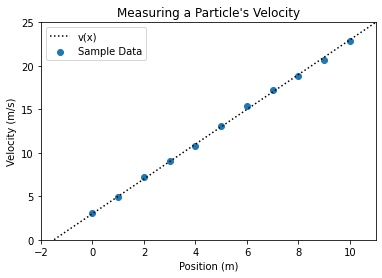

In [3]:
# Plot the Sample Data as a scatter plot
# The scatter function takes the independent variable first and the dependent second
# The label keyword is for displaying the legend later
_ = plt.scatter(X, Y, label='Sample Data')

# Plot the Function
# I'll generate another set of variables to make this plot
xLine = np.arange(-2., 12)  # Generates data from -2 to 11 with stepsize 1
yLine = 2*xLine + 3         # Create y from the x data and known function
_ = plt.plot(xLine, yLine, ':k', label='v(x)')

# Set the Limits for the axis
plt.xlim(-2, 11)
plt.ylim( 0, 25)

# Label Everything!
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title("Measuring a Particle's Velocity")

# Add the grid if wanted
# Uncomment the next line if you want the plot to be gridded
# plt.grid()

# Create the Legend
_ = plt.legend()

Now that we are comfortable with plotting, let's move on the the linear regression.

In [4]:
# Create/Fit the Model
# sklearn is built around a framework of fitting data to models. Here, we are trying
#   to fit our data to a linear model with linear regression.
# Below, we are creating a linear regression model, fitting the model to our data
#   then we are storing that information in the variable named model
model = LinearRegression().fit(X, Y)

# Print out the fit
# Note that the slope parameter is stored as the model.coef_ and the
#   intercept is stored as model.intercept_
# We store the equation in a string for future use
eqStr = 'v(x) = {:.2f} x + {:.2f}'.format(model.coef_.item(), model.intercept_.item())
print('Model Fit')
print('v(x) =   m  x +   b')
print(eqStr)

Model Fit
v(x) =   m  x +   b
v(x) = 1.98 x + 3.13


As can be seen above, we were able to approximate the generating function based on the given data. Although the "random" fluctuations created a slight error in our coeficient and intercept, we got close to the predicted value.

Now, let's recreate the plot above with our regression too.

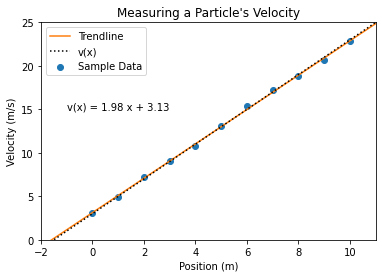

In [5]:
# Plot the Sample Data as a scatter plot
_ = plt.scatter(X, Y, label='Sample Data')

# Plot the Regression Model
# For this, we need an xLine that is a 2D column vector like above
# We will calculate the y values by predicting with our model
xLine = np.arange(-2., 12)[:, np.newaxis]  # Generates data from -2 to 11 with stepsize 1
yLine = model.predict(xLine)               # Create y from the x data and known function
_ = plt.plot(xLine, yLine, 'C1', label='Trendline')

# Add the equation string we printed above on the graph
_ = plt.text(-1, 15, eqStr)

# Plot the Function
yLine = 2*xLine + 3         # Create y from the x data and known function
_ = plt.plot(xLine, yLine, ':k', label='v(x)')

# Set the Limits for the axis
plt.xlim(-2, 11)
plt.ylim( 0, 25)

# Label Everything!
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title("Measuring a Particle's Velocity")

# Add the grid if wanted
# Uncomment the next line if you want the plot to be gridded
# plt.grid()

# Create the Legend
_ = plt.legend()

As you can see, the model fits the data well and almost perfectly recovers the generating function.

### Your Turn

Now it's your turn, input the following data into the variables below and let my code from above take care of the rest.

| x (m) | v (m/s) |
| ----- | ------- |
|  0.00 |    2.09 |
|  2.00 |    7.91 |
|  4.00 |   14.45 |
|  6.00 |   20.07 |
|  8.00 |   25.63 |
| 10.00 |   32.25 |
| 12.00 |   38.91 |
| 14.00 |   44.66 |
| 16.00 |   49.51 |
| 18.00 |   55.11 |
| 20.00 |   61.56 |


In [ ]:
# Store the Positions
X = np.array([[]], dtype='float64').T

# Store the Velocities
Y = np.array([[
    
]]).T

# Create/Fit the Model
model = LinearRegression().fit(X, Y)

# Print out the fit
eqStr = 'v(x) = {:.2f} x + {:.2f}'.format(model.coef_.item(), model.intercept_.item())
print('Model Fit')
print('v(x) =   m  x +   b')
print(eqStr)

# Plot the Sample Data as a scatter plot
_ = plt.scatter(X, Y, label='Sample Data')

# Plot the Regression Model
xLine = np.arange(-2., 22)[:, np.newaxis]  # Generates data from -2 to 11 with stepsize 1
yLine = model.predict(xLine)               # Create y from the x data and known function
_ = plt.plot(xLine, yLine, 'C1', label='Trendline')

# Add the equation string we printed above on the graph
_ = plt.text(-1, 40, eqStr)

# Plot the Function
yLine = 3*xLine + 2         # Create y from the x data and known function
_ = plt.plot(xLine, yLine, ':k', label='v(x)')

# Set the Limits for the axis
plt.xlim(-2, 21)
plt.ylim( 0, 65)

# Label Everything!
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title("Measuring a Particle's Velocity")

# Add the grid if wanted
# Uncomment the next line if you want the plot to be gridded
# plt.grid()

# Create the Legend
_ = plt.legend()